In [1]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    USING_COLAB = True
except:
    USING_COLAB = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import time
from datetime import datetime

In [4]:
from concurrent.futures import ThreadPoolExecutor
from nltk.corpus import stopwords
import spacy
import nltk
import string
import threading

In [5]:
if USING_COLAB:
    path_dataset = "/content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data"
    sufix = "colab"
else:
    path_dataset = "./data"
    sufix = "colab"

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv(path_dataset + "/projects_augmented_" + sufix + ".csv")

/tmp/ipython-input-2602201521.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_dataset + "/projects_augmented_" + sufix + ".csv")


In [8]:
# df = df.iloc[:5000]

In [9]:
df.rename(columns={"titulo": "text"}, inplace=True)

In [10]:
df.shape

(170000, 9)

In [11]:
df.tail(10)

,text,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL,ESTADO,gpu_used,batch_id
169990,planteamiento de barras solares para evitar ca...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de mejora para la mitigación de cong...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169991,servicio de automatizacion de procesos para re...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de mejora para la manipulación de ma...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169992,tecnicas de implementacion de baliza led en el...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de mejora en procesos logísticos par...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169993,dispositivos de mejora de seguridad en despach...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de mejora de seguridad en despacho d...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169994,propuesta de tecnologia para procesos logistic...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de implementación de baliza led en e...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169995,propuesta da mejora para la manipulacion de ma...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de automatización de procesos para r...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169996,propuesta de mejora para permitir mitigacion d...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Planteamiento de barras imantadas para evitar ...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169997,propuesta como tecnologia en eficiencia operat...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de una estrategia de manejo de conte...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169998,propuesta de algunas estrategia de manejo de c...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de optimización en eficiencia operat...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...
169999,planteamiento de tecnicas imantadas que evitar...,Facultad de Ingeniería Marítima y Ciencias del...,Tecnología Superior en Logistica Portuaria,Propuesta de mejora para la mitigación de cong...,NaN,NaN,NaN,0.0,Tecnología Superior en Logistica Portuaria_GPU...


In [12]:
df["text"].nunique(), df["NOMBREPROYEC"].nunique(), df["FACULTAD"].nunique(), df["CARRERA"].nunique()

(168259, 18672, 10, 34)

In [13]:
df_carrera_count = df["CARRERA"].value_counts()
df_carrera_count[df_carrera_count == 5000].shape, df["CARRERA"].nunique()

((34,), 34)

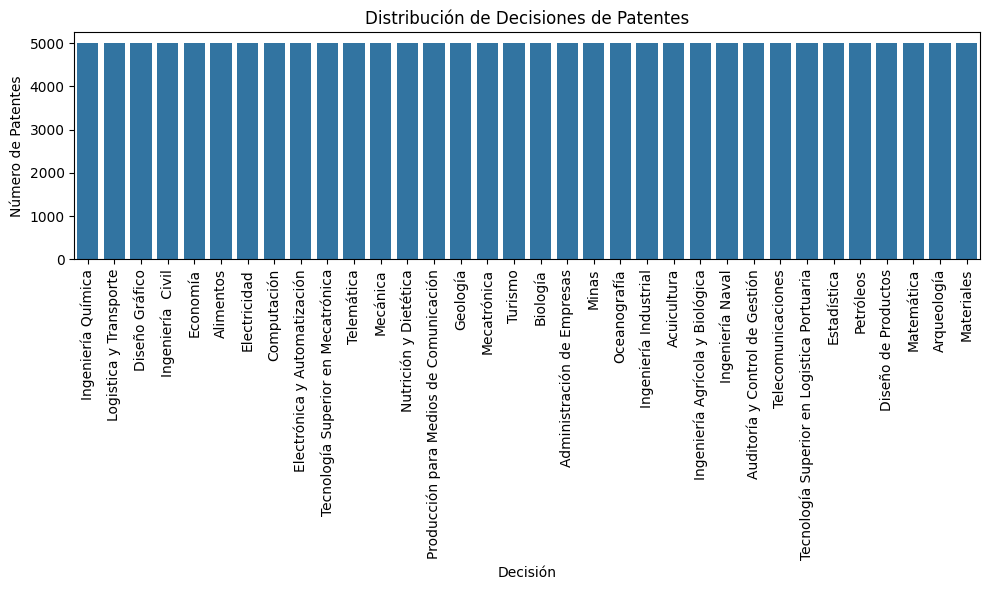

In [14]:
# diagrama de barras de la columna "decision"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CARRERA', order=df['CARRERA'].value_counts().index)
plt.title('Distribución de Decisiones de Patentes')
plt.xlabel('Decisión')
plt.ylabel('Número de Patentes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Lematizacion

In [15]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
nlp = spacy.load("es_core_news_lg")

In [17]:
# COLAB
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords_es = set(stopwords.words('spanish'))
stopwords_en = set(stopwords.words('english'))
stop_words = stopwords_es | stopwords_en

In [19]:
# Función de limpieza y lematización
def procesar_texto(texto):
    if pd.isna(texto):
        return ""
    # Unicode, minúsculas, quitar puntuación
    texto = texto.lower().translate(str.maketrans('', '', string.punctuation))
    # Procesar con spaCy
    doc = nlp(texto)
    # Lematizar y quitar stopwords
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and not token.is_punct and not token.is_space]
    # *************************************** REVISAR *****************************************
    # tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    # *****************************************************************************************

    return " ".join(tokens)

# Unir columnas y procesar
def crear_corpus(row):
    return procesar_texto(str(row['text']))

In [20]:
# OPCIÓN 1: Paralelización con ThreadPoolExecutor (más simple)
def procesar_corpus_paralelo_threads(df, num_threads=3):
    """
    Paraleliza el procesamiento usando ThreadPoolExecutor
    Mejor para I/O bound tasks
    """
    def procesar_batch(batch_df):
        """Procesa un batch de filas"""
        return batch_df.apply(crear_corpus, axis=1)

    # Dividir el DataFrame en batches
    batches = np.array_split(df, num_threads)

    print(f"Procesando {len(df)} filas en {num_threads} hilos...")
    print(f"Tamaños de batch: {[len(batch) for batch in batches]}")

    # Procesar en paralelo
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(procesar_batch, batches))

    # Concatenar resultados
    corpus_procesado = pd.concat(results, ignore_index=True)
    return corpus_procesado


# Híbrida - dividir por chunks y usar threads
def procesar_corpus_paralelo_chunks(df, num_threads=3, chunk_size=1000):
    """
    Divide el DataFrame en chunks y procesa cada chunk en paralelo
    Útil para DataFrames muy grandes
    """
    def procesar_chunk(chunk_data):
        chunk_df, chunk_idx = chunk_data

        # Obtener información del hilo actual
        thread_id = threading.current_thread().ident
        thread_name = threading.current_thread().name
        start_time = time.time()
        timestamp = datetime.now().strftime("%H:%M:%S.%f")[:-3]

        print(f"  [{timestamp}] 🚀 Chunk {chunk_idx:2d} ({len(chunk_df):4d} filas) -> {thread_name} (ID: {thread_id})")

        return chunk_df.apply(crear_corpus, axis=1)

    # Dividir en chunks
    chunks = []
    for i in range(0, len(df), chunk_size):
        chunk = df.iloc[i:i+chunk_size]
        chunks.append((chunk, i//chunk_size))

    print(f"📊 Procesando {len(df)} filas en {len(chunks)} chunks usando {num_threads} hilos...")
    print(f"📦 Tamaños de chunks: {[len(chunk[0]) for chunk in chunks]}")

    start_total = time.time()

    # Procesar chunks en paralelo
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        print(f"\n🔄 Iniciando procesamiento paralelo...")
        results = list(executor.map(procesar_chunk, chunks))
        print(f"\n🎉 Procesados {len(results)} chunks")

    end_total = time.time()
    total_duration = end_total - start_total

    print(f"\n🎉 Todos los chunks procesados en {total_duration:.2f}s")

    # Concatenar resultados
    corpus_procesado = pd.concat(results, ignore_index=True)
    print(f"✅ Procesamiento completo. Total de filas procesadas: {len(corpus_procesado)}")
    return corpus_procesado

In [21]:
# Método Chunks con threads
print("Usando chunks con ThreadPoolExecutor:")
df["CORPUS"] = procesar_corpus_paralelo_chunks(df, num_threads=12, chunk_size=3000) # 2 min 59.2s
# df["CORPUS"] = procesar_corpus_paralelo_threads(df, num_threads=12) #, 4 min 28.4s

print("Shape del dataframe: ", df.shape[0])

Usando chunks con ThreadPoolExecutor:
📊 Procesando 170000 filas en 340 chunks usando 12 hilos...
📦 Tamaños de chunks: [500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 5

In [22]:
df.head(5)

,text,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL,ESTADO,gpu_used,batch_id,CORPUS
0,preparación de nano celulosa y su utilización ...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,Preparación de nano celulosa y su utilización ...,72.0,0,Activa,NaN,NaN,preparación nano celulós utilización material ...
1,monitoreo no intrusivo de cargas eléctricas en...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,71.0,0,Activa,NaN,NaN,monitoreo intrusivo carga eléctrico consumidor...
2,difusión del uso de herramientas tecnológicas ...,"Facultad de Arte, Diseño y Comunicación Audiov...",Diseño Gráfico,Difusión del uso de herramientas tecnológicas ...,62.0,0,Activa,NaN,NaN,difusión uso herramienta tecnológico agricultu...
3,variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,Variacion del tiempo de fraguado debido a mixt...,56.0,0,Activa,NaN,NaN,variacion tiempo fraguado debido mixtura aditivo
4,tecnologías aplicadas y análisis económico en ...,Facultad de Ciencias Sociales y Humanísticas,Economía,Tecnologías aplicadas y análisis económico en ...,54.0,0,Activa,NaN,NaN,tecnología aplicado análisis económico producc...


In [23]:
df_copy = df.copy()

In [24]:
df_copy.to_csv(path_dataset + "/projects_processed_" + sufix + ".csv", index=False)
print(f"Archivo guardado en: {path_dataset}/projects_processed_{sufix}.csv")
print("¡Procesamiento completado y archivo guardado!")

Archivo guardado en: /content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data/projects_processed_colab.csv
¡Procesamiento completado y archivo guardado!
